In [1]:
from scipy import stats

In [2]:
stats.norm.cdf(70, loc=60, scale=10)   ## Probablity at x=70, Area under the curve in normal distribution.
                                     ## It gives area to the left side of the random variable in graph.

0.8413447460685429

In [6]:
a=stats.norm.cdf(680, loc=711, scale=29)

In [7]:
b=stats.norm.cdf(740, loc=711, scale=29)

In [9]:
c=b-a
c                    ## TO find out area of given range.

0.6988021422297268

### Glaxo and BEML datsets

In [10]:
import pandas as pd
import numpy as np

In [22]:
beml_df = pd.read_csv("D:\\DATA_science\\Data_sets\\BEML.csv")

In [12]:
beml_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [23]:
glaxo_df = pd.read_csv("D:\\DATA_science\\Data_sets\\GLAXO.csv")

In [14]:
glaxo_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [19]:
beml_cl = beml_df[['Date', 'Close']]
glaxo_cl = glaxo_df[['Date', 'Close']]

In [20]:
beml_cl

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [21]:
glaxo_cl

,Date,Close
0,2010-01-04,1625.65
1,2010-01-05,1616.80
2,2010-01-06,1638.50
3,2010-01-07,1648.70
4,2010-01-08,1639.80
...,...,...
1734,2016-12-26,2723.50
1735,2016-12-27,2701.75
1736,2016-12-28,2702.15
1737,2016-12-29,2727.90


In [24]:
glaxo_df = glaxo_cl.set_index(pd.DatetimeIndex(glaxo_cl['Date']))
beml_df = beml_cl.set_index(pd.DatetimeIndex(beml_cl['Date']))

In [25]:
glaxo_df

,Date,Close
Date,,
2010-01-04,2010-01-04,1625.65
2010-01-05,2010-01-05,1616.80
2010-01-06,2010-01-06,1638.50
2010-01-07,2010-01-07,1648.70
2010-01-08,2010-01-08,1639.80
...,...,...
2016-12-26,2016-12-26,2723.50
2016-12-27,2016-12-27,2701.75
2016-12-28,2016-12-28,2702.15


Text(0, 0.5, 'Close price')

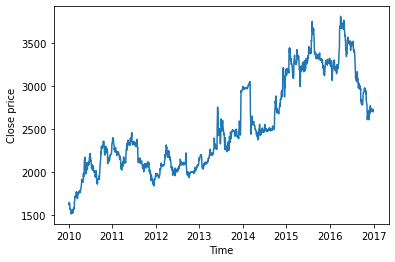

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.plot(glaxo_df.Close)
plt.xlabel('Time')
plt.ylabel('Close price')

Text(0, 0.5, 'Close price')

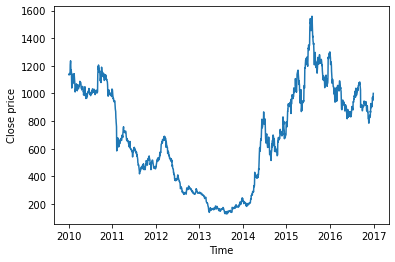

In [28]:
plt.plot(beml_df.Close)
plt.xlabel('Time')
plt.ylabel('Close price')

In [29]:
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods = 1)
beml_df['gain'] = beml_df.Close.pct_change(periods = 1)

In [30]:
## Drop first row since it is Nan
glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()

Text(0, 0.5, 'Gain')

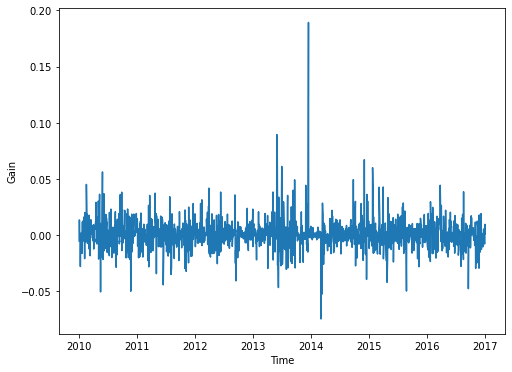

In [31]:
## Plot the gains
plt.figure(figsize=(8, 6))
plt.plot(glaxo_df.index, glaxo_df.gain)
plt.xlabel('Time')
plt.ylabel('Gain')

Text(0, 0.5, 'Gain')

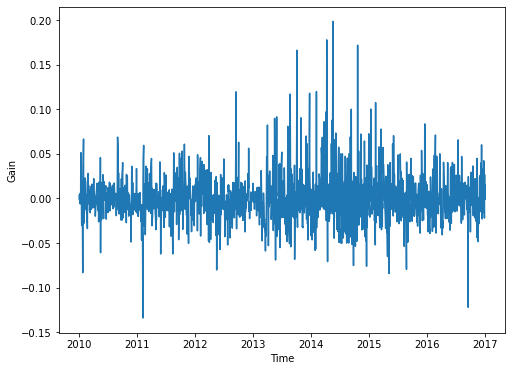

In [32]:
## Plot the gains
plt.figure(figsize=(8, 6))
plt.plot(beml_df.index, beml_df.gain)
plt.xlabel('Time')
plt.ylabel('Gain')

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


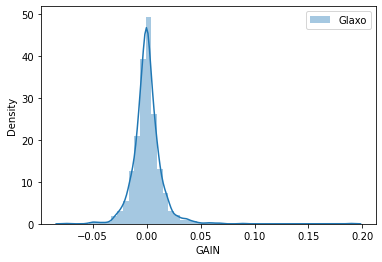

In [35]:
sns.distplot(glaxo_df.gain, label='Glaxo')
plt.xlabel('GAIN')
plt.ylabel('Density')
plt.legend()
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


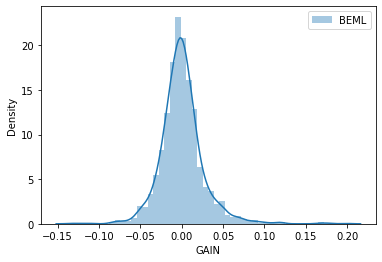

In [36]:
sns.distplot(beml_df.gain, label='BEML')
plt.xlabel('GAIN')
plt.ylabel('Density')
plt.legend()
plt.show()

In [37]:
print('Mean:', round(glaxo_df.gain.mean(), 4))
print('Mean:', round(beml_df.gain.mean(), 4))

Mean: 0.0004
Mean: 0.0003


In [38]:
print('Standard Deviation:', round(glaxo_df.gain.std(), 4))
print('Standard Deviation:', round(beml_df.gain.std(), 4))

Standard Deviation: 0.0134
Standard Deviation: 0.0264


In [39]:
from scipy import stats
# Probability of making 2% loss or more in glaxo
stats.norm.cdf(-0.02, loc = glaxo_df.gain.mean(), scale = glaxo_df.gain.std())

0.06352488667177397

In [40]:
# Probability of making 2% loss or more in beml
stats.norm.cdf(-0.02, loc = beml_df.gain.mean(), scale = beml_df.gain.std())

0.22155987503755292

In [43]:
# Probability of making 2% gain or more in glaxo
1 - stats.norm.cdf(0.02, loc = glaxo_df.gain.mean(), scale = glaxo_df.gain.std())

0.07104511457618568

In [44]:
# Probability of making 2% loss or more in beml
1 - stats.norm.cdf(0.02, loc = beml_df.gain.mean(), scale = beml_df.gain.std())

0.22769829484075343